# Exploratory Data Analysis – Processed Predictive Maintenance Dataset

## Jupiter notebook for EDA of the cleaned processed dataset


This notebook explores the cleaned and feature-engineered dataset.
The goal is to:

- Understand class imbalance
- Inspect engineered features
- Detect redundancy
- Identify predictive signal before modeling


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [3]:
df = pd.read_csv(r"/datasets/preprocessed.csv", parse_dates=["date"])

print("Shape:", df.shape)
df.head()


Shape: (124493, 79)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,...,metric9_rs14,metric1_delta,metric2_delta,metric3_delta,metric4_delta,metric5_delta,metric6_delta,metric7_delta,metric8_delta,metric9_delta
0,2015-01-01,S1F01085,0,2.156307e+08,4.025352,0.0,3.258097,1.94591,407438.0,0.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,2015-01-02,S1F01085,0,2.401016e+06,4.043051,0.0,3.258097,1.94591,407438.0,0.0,...,0.0,-1.066148e+08,0.008850,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,2015-01-03,S1F01085,0,1.240174e+08,4.043051,0.0,3.258097,1.94591,407438.0,0.0,...,0.0,1.000102e+07,0.005900,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,2015-01-04,S1F01085,0,1.280732e+08,4.043051,0.0,3.258097,1.94591,407439.0,0.0,...,0.0,1.054265e+07,0.004425,0.0,0.0,0.0,0.75,0.0,0.0,0.0
4,2015-01-05,S1F01085,0,9.739345e+07,4.043051,0.0,3.258097,1.94591,408114.0,0.0,...,0.0,-1.610970e+07,0.003540,0.0,0.0,0.0,540.60,0.0,0.0,0.0


In [4]:
# quick review
df.info()
df.describe().T.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124493 entries, 0 to 124492
Data columns (total 79 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           124493 non-null  datetime64[ns]
 1   device         124493 non-null  object        
 2   failure        124493 non-null  int64         
 3   metric1        124493 non-null  float64       
 4   metric2        124493 non-null  float64       
 5   metric3        124493 non-null  float64       
 6   metric4        124493 non-null  float64       
 7   metric5        124493 non-null  float64       
 8   metric6        124493 non-null  float64       
 9   metric7        124493 non-null  float64       
 10  metric8        124493 non-null  float64       
 11  metric9        124493 non-null  float64       
 12  year           124493 non-null  int64         
 13  month          124493 non-null  int64         
 14  day            124493 non-null  int64         
 15  

,count,mean,min,25%,50%,75%,max,std
date,124493,2015-04-16 05:19:50.900692992,2015-01-01 00:00:00,2015-02-09 00:00:00,2015-03-27 00:00:00,2015-06-17 00:00:00,2015-11-02 00:00:00,NaN
failure,124493.0,0.000851,0.0,0.0,0.0,0.0,1.0,0.029167
metric1,124493.0,122387936.983864,2401016.32,61283456.0,122797128.0,183309088.0,241791211.84,70418745.362751
metric2,124493.0,0.308148,0.0,0.0,0.0,0.0,7.887959,1.383779
metric3,124493.0,0.16318,0.0,0.0,0.0,0.0,4.682131,0.715944
metric4,124493.0,0.150989,0.0,0.0,0.0,0.0,3.258097,0.567705
metric5,124493.0,2.486701,1.609438,2.197225,2.397895,2.564949,4.532599,0.569318
metric6,124493.0,259937.510295,26.0,221452.0,249800.0,310266.0,501012.56,98504.099887
metric7,124493.0,0.025707,0.0,0.0,0.0,0.0,2.197225,0.23616
metric8,124493.0,0.025707,0.0,0.0,0.0,0.0,2.197225,0.23616


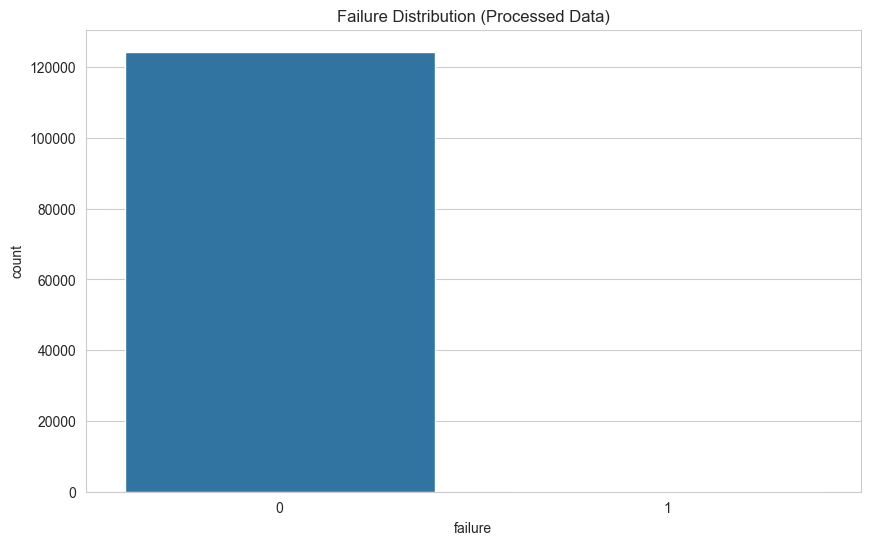

failure
0    0.999149
1    0.000851
Name: proportion, dtype: float64


In [5]:
sns.countplot(x="failure", data=df)
plt.title("Failure Distribution (Processed Data)")
plt.show()

print(df["failure"].value_counts(normalize=True))


The dataset remains highly imbalanced, with failures representing a small fraction of total observations. Accuracy alone would not be an appropriate metric.

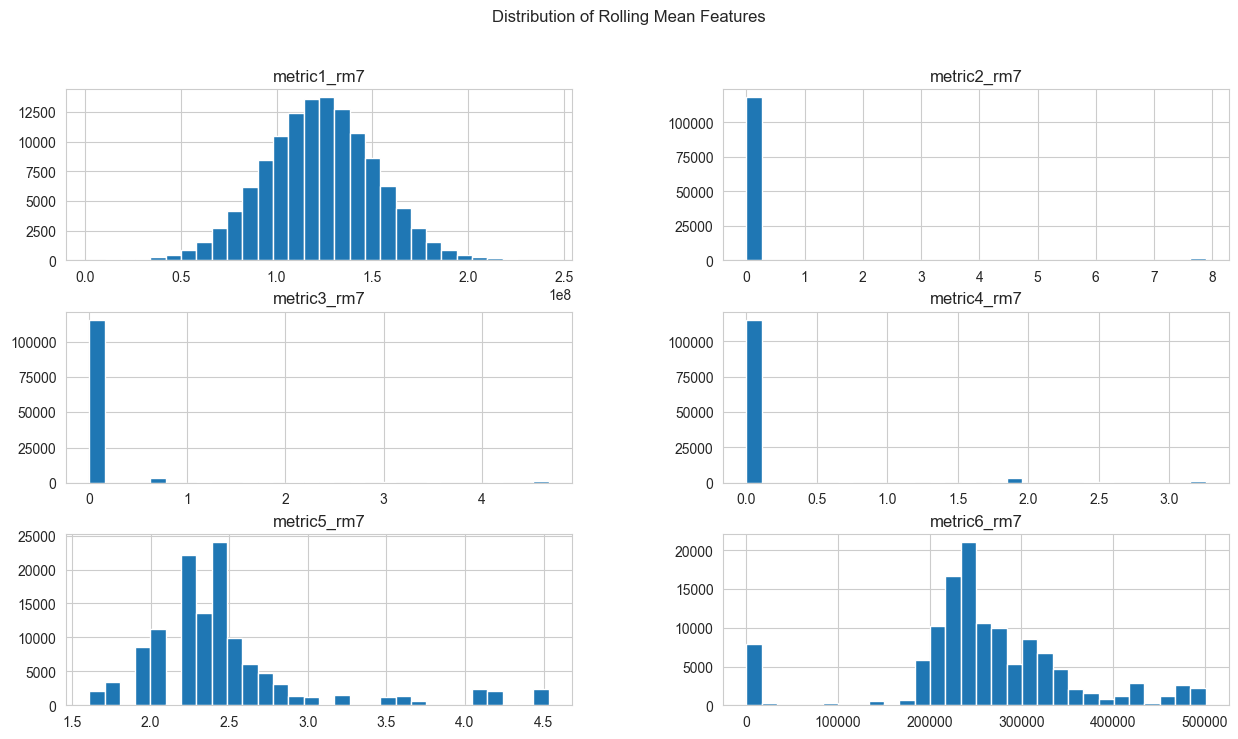

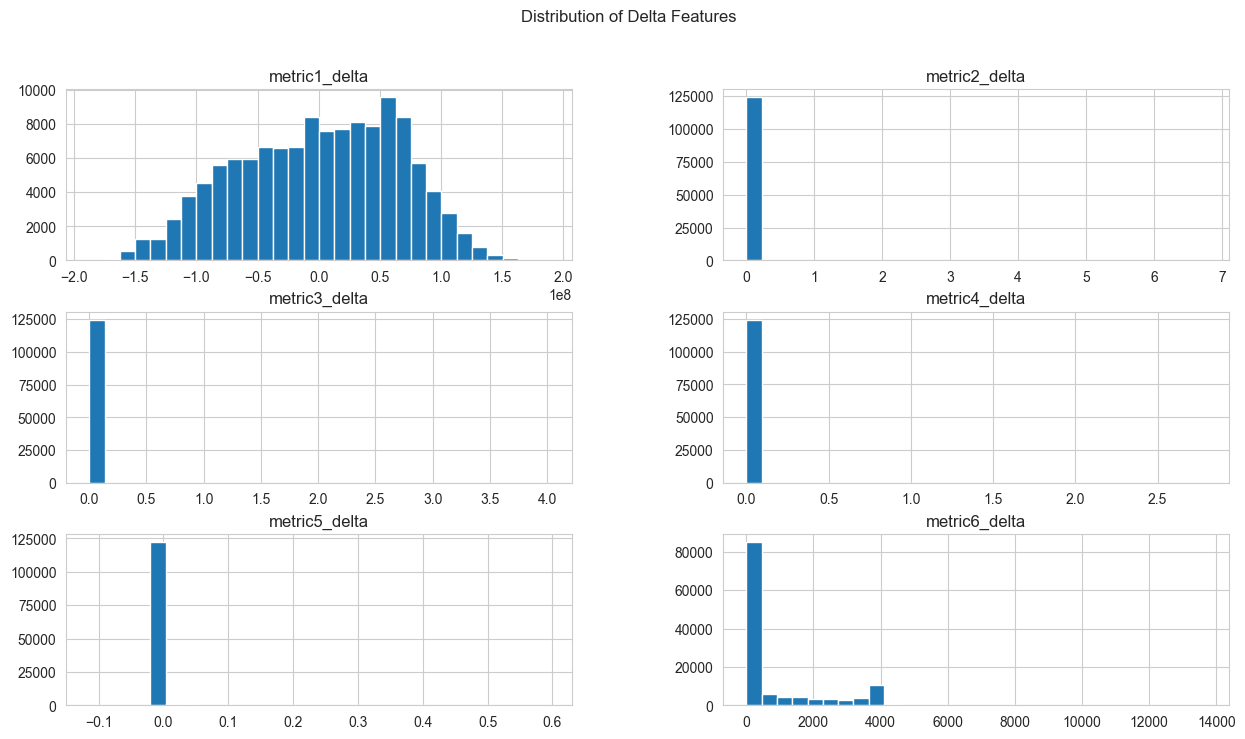

failure          1.000000
metric4_rs7      0.147270
metric4_delta    0.144553
metric7_rs7      0.136046
metric8_rs7      0.136046
metric4_rs14     0.132167
metric7_rs14     0.118077
metric8_rs14     0.118077
metric4_rs3      0.110762
metric8_rs3      0.101378
metric7_rs3      0.101378
metric7          0.096752
metric8          0.096752
metric2_rs7      0.092912
metric7_rm3      0.092364
Name: failure, dtype: float64

In [6]:
rolling_cols = [c for c in df.columns if "_rm7" in c][:6]  # show few only

df[rolling_cols].hist(bins=30, figsize=(15,8))
plt.suptitle("Distribution of Rolling Mean Features")
plt.show()
delta_cols = [c for c in df.columns if "_delta" in c][:6]

df[delta_cols].hist(bins=30, figsize=(15,8))
plt.suptitle("Distribution of Delta Features")
plt.show()
corr = df.corr(numeric_only=True)["failure"].sort_values(ascending=False)

corr.head(15)


In [7]:
corr.tail(15)


metric3_rm3      0.000706
metric3          0.000696
metric1_delta    0.000448
month            0.000322
metric3_rs3     -0.000375
metric3_delta   -0.000545
metric3_rs7     -0.000568
metric6         -0.000728
metric3_rs14    -0.000740
metric6_rm3     -0.000783
metric6_rm7     -0.000831
metric6_rm14    -0.000933
metric1_rs3     -0.002124
dayofweek       -0.012842
year                  NaN
Name: failure, dtype: float64

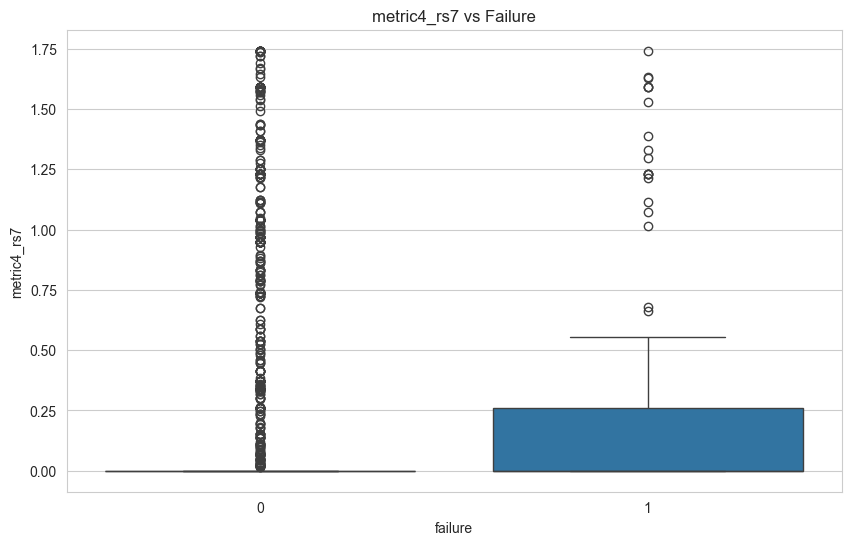

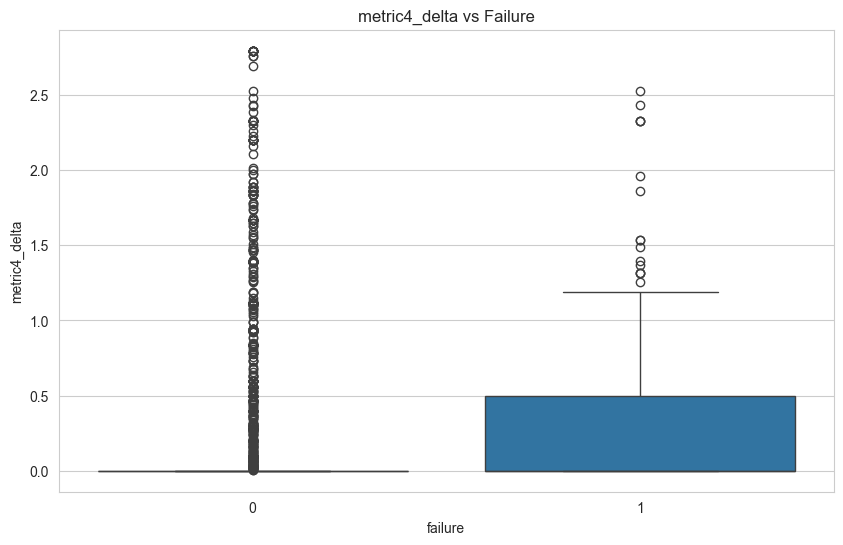

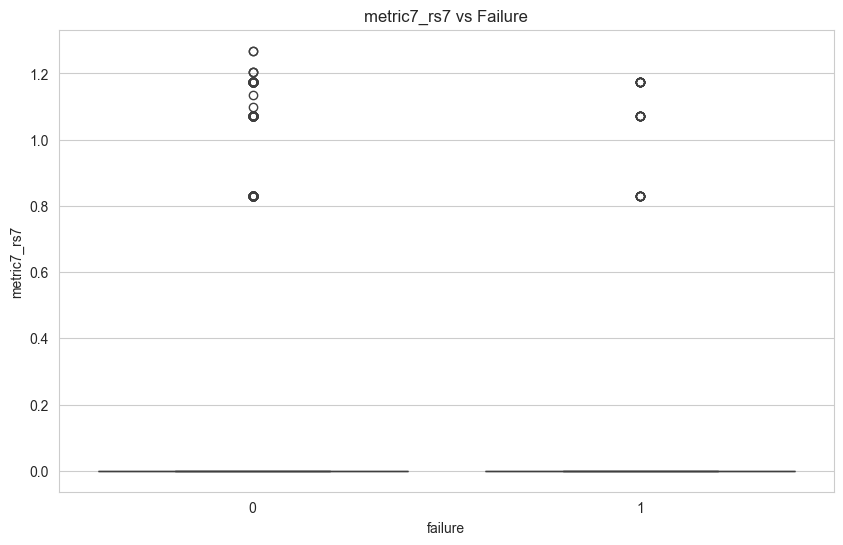

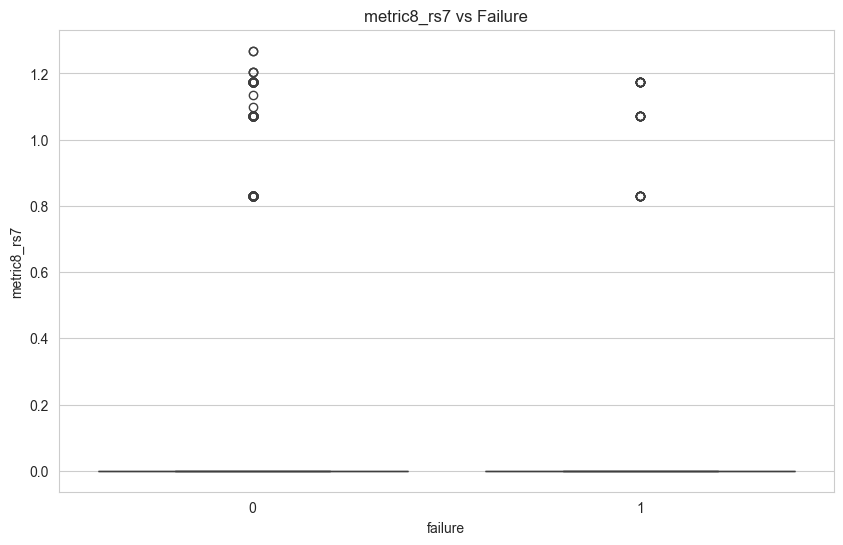

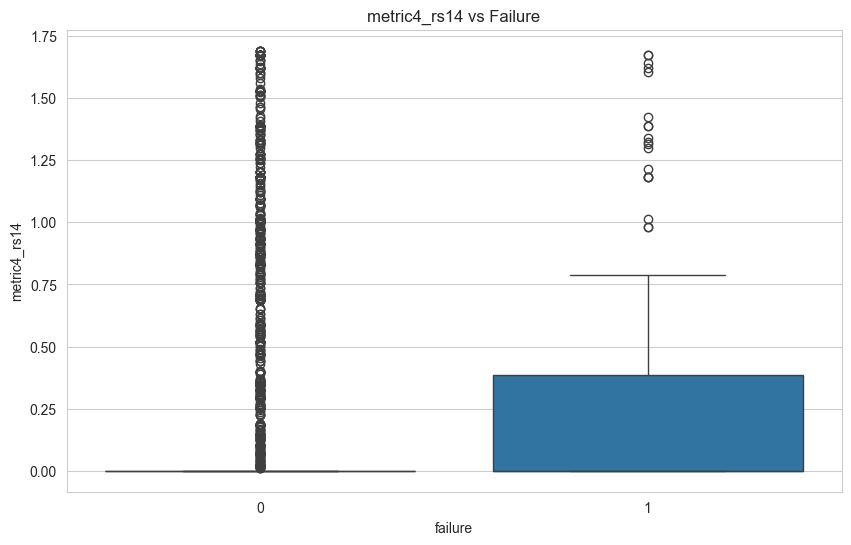

In [8]:
top_features = corr.abs().sort_values(ascending=False).index[1:6]

for col in top_features:
    sns.boxplot(x="failure", y=col, data=df)
    plt.title(f"{col} vs Failure")
    plt.show()


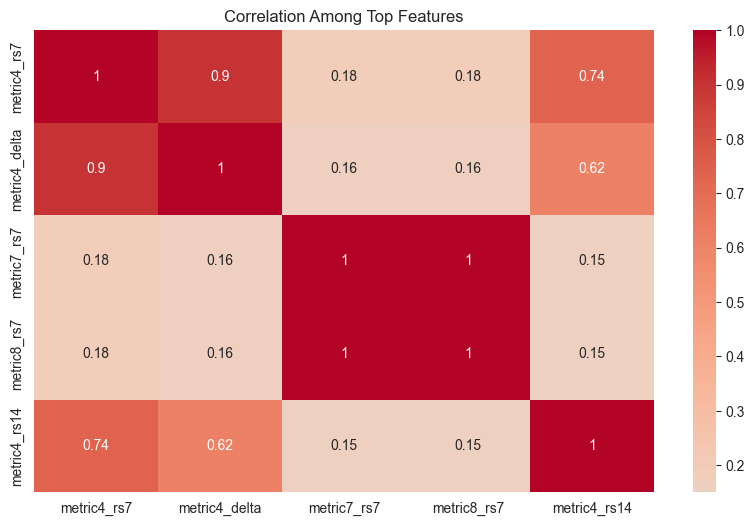

In [9]:
feature_subset = df[top_features]

sns.heatmap(feature_subset.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Among Top Features")
plt.show()


In [11]:
device_failure = df.groupby("device")["failure"].mean().sort_values(ascending=False)

device_failure.head(10)


device
S1F0RRB1    0.200000
S1F0CTDN    0.142857
S1F10E6M    0.142857
S1F11MB0    0.142857
Z1F1AG5N    0.111111
W1F0PNA5    0.111111
W1F13SRV    0.076923
W1F03DP4    0.071429
W1F1230J    0.071429
W1F0T034    0.058824
Name: failure, dtype: float64

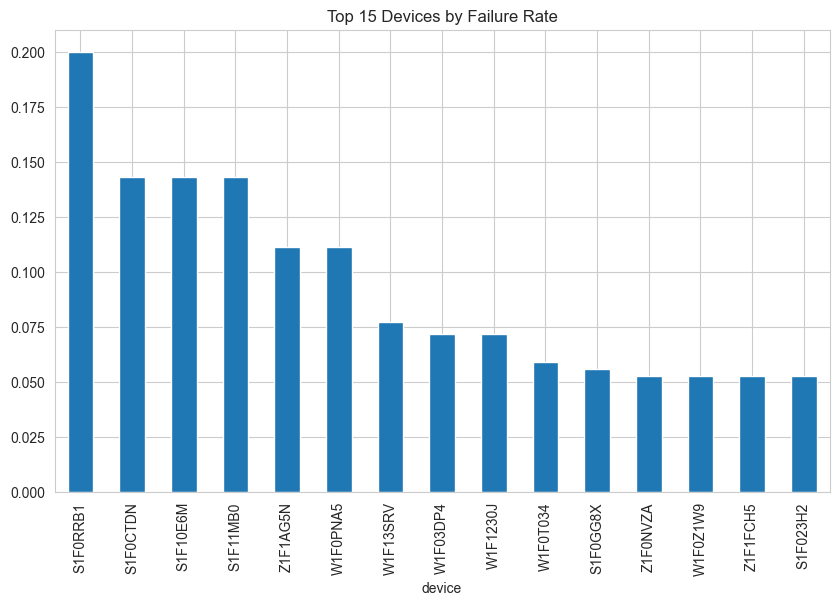

In [12]:
device_failure.head(15).plot(kind="bar")
plt.title("Top 15 Devices by Failure Rate")
plt.show()
